資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [13]:
#1.利用Pandas中的pd.read_csv()分別讀取
#2.刪除csv中第二列英文翻譯
A=pd.read_csv('A_lvr_land_A.csv')[1:]
B=pd.read_csv('B_lvr_land_A.csv')[1:]
E=pd.read_csv('E_lvr_land_A.csv')[1:]
F=pd.read_csv('F_lvr_land_A.csv')[1:]


In [14]:
#3. 生成city欄位其中以地區分類
A["city"] = "Taipei"
B["city"] = "New_Taipei"
E["city"] = "Taichung"
F["city"] = "Kaohsiung"

In [15]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([A,B,E,F],ignore_index=True)
data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,Kaohsiung
59472,三峽區,土地,成福段成福小段331~360地號,762.0,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,Kaohsiung
59473,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,Kaohsiung
59474,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,Kaohsiung


In [16]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [21]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data.rename(columns=columns_mapping)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,Kaohsiung
59472,三峽區,土地,成福段成福小段331~360地號,762.0,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,Kaohsiung
59473,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,Kaohsiung
59474,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,Kaohsiung


In [23]:
dataclean = data[(data['main_use']=="住家用")&(data['use_zoning']=="住")]
datanew = pd.DataFrame(dataclean, columns = analysis_columns)
datanew = datanew.dropna()
print(datanew.info())
display(datanew)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 51169
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB
None


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48924,Kaohsiung,三重區,住家用,住,7280000,84.53,75.34,1090611,86123,5,0,5
49200,Kaohsiung,三重區,住家用,住,7350000,84.63,84.63,1090521,86849,4,0,4
49735,Kaohsiung,三重區,住家用,住,6000000,67.0,67.00,1090522,89552,1,1,1
49799,Kaohsiung,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924,3,2,2


In [24]:
dataend = datanew.copy().reset_index(drop=True)
dataend["building_area_square_meter"] = dataend["building_area_square_meter"].astype("float64")
dataend["main_building_area"] = dataend["main_building_area"].astype("float64")
dataend["total_price"] = dataend["total_price"].astype("int")
dataend["unit_price"] = dataend["unit_price"].astype("int")
dataend["room_number"] = dataend["room_number"].astype("int")
dataend["hall_number"] = dataend["hall_number"].astype("int")
dataend["health_number"] = dataend["health_number"].astype("int")
print(dataend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7802 entries, 0 to 7801
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   int32  
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(2), int32(5), object(5)
memory usage: 579.2+ KB
None


In [26]:
dataend['tx_dt_year'] = dataend['tx_dt'].apply(lambda x: x[:3])

dataend = dataend[(dataend['tx_dt_year'] == '109') & (dataend['room_number'] >= 1) & (dataend['hall_number'] <= 2) & (dataend['room_number'] <= 5) & (dataend['hall_number'] >= 1)]
dataend.reset_index(inplace = True, drop = True)
dataend.head()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2,109


In [27]:
dataend["building_area_square_feet"] = dataend["building_area_square_meter"]*0.3025
dataend["main_building_area_square_feet"] = dataend["main_building_area"]*0.3025
dataend["unit_price_square_feet"] = dataend["unit_price"]/0.3025

In [28]:
dataend.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


In [29]:
dataend.drop(dataend[dataend['total_price'] == 0].index, inplace = True)
dataend.drop(dataend[dataend['main_building_area'] == 0].index, inplace = True)
dataend.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


In [36]:
#要先知道測量變數是總價，其產生的推算變數有單位元坪、
#單價元坪，平方單位變數不考慮，剩下房、廳、衛、建物移轉總面積坪、主建物面積坪

from scipy import stats
tp = dataend[dataend["city"]=="Taipei"]
tp = tp.select_dtypes(exclude = ['object'])


z=stats.pearsonr(tp["room_number"],tp["total_price"])
y=stats.pearsonr(tp["hall_number"],tp["total_price"])
x=stats.pearsonr(tp["health_number"],tp["total_price"])
w=stats.pearsonr(tp["building_area_square_feet"],tp["total_price"])
v=stats.pearsonr(tp["main_building_area_square_feet"],tp["total_price"])
u=stats.pearsonr(tp["unit_price_square_feet"],tp["total_price"])

print("相關性：\n房&價錢:",f"{z}","\n廳&價錢:",f"{y}","\n衛&價錢:",f"{x}",
      "\n建物移轉總面積坪&價錢:",f"{w}","\n主建物面積坪&價錢:",f"{v}","\n單價元坪&價錢:",f"{u}")

相關性：
房&價錢: (0.3264414001909922, 1.5741573484949933e-35) 
廳&價錢: (0.2707867362222963, 1.4974349832169536e-24) 
衛&價錢: (0.5988317082017807, 1.1294445449814105e-134) 
建物移轉總面積坪&價錢: (0.8646266775371656, 0.0) 
主建物面積坪&價錢: (0.7105154108206191, 5.969136685890878e-212) 
單價元坪&價錢: (0.5812901524655661, 3.4926559701817947e-125)


In [38]:
z=stats.pearsonr(tp["room_number"],tp["unit_price_square_feet"])
y=stats.pearsonr(tp["hall_number"],tp["unit_price_square_feet"])
x=stats.pearsonr(tp["health_number"],tp["unit_price_square_feet"])
w=stats.pearsonr(tp["building_area_square_feet"],tp["unit_price_square_feet"])
v=stats.pearsonr(tp["main_building_area_square_feet"],tp["unit_price_square_feet"])

print("相關性：\n房&單價元坪:",f"{z}","\n廳&單價元坪:",f"{y}","\n衛&單價元坪:",f"{x}",
      "\n建物移轉總面積坪&單價元坪:",f"{w}","\n主建物面積坪&單價元坪:",f"{v}")

相關性：
房&單價元坪: (-0.10006239729545555, 0.00020102690874463993) 
廳&單價元坪: (0.004883414682447884, 0.856380017736484) 
衛&單價元坪: (0.12821692845522695, 1.828375411366138e-06) 
建物移轉總面積坪&單價元坪: (0.21818526806469485, 2.724918739541817e-16) 
主建物面積坪&單價元坪: (0.11248847297456453, 2.8871643465517586e-05)


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='city', ylabel='unit_price_square_feet'>

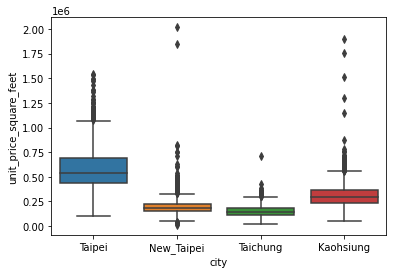

In [41]:
sns.boxplot(x=dataend['city'],y=dataend['unit_price_square_feet'])

<AxesSubplot:xlabel='room_number', ylabel='total_price'>

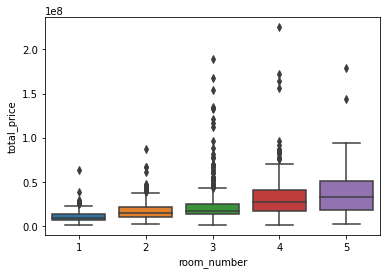

In [42]:
sns.boxplot(x=tp["room_number"], y=tp['total_price'])

In [45]:
from sklearn.preprocessing import LabelEncoder

In [53]:
tpcopy = tp.copy()
le = LabelEncoder()
tpcopy["towns"]=le.fit_transform(tpcopy["towns"])
#將數字再轉回地區區名
tpcopy["towns"]=le.inverse_transform(tpcopy["towns"])

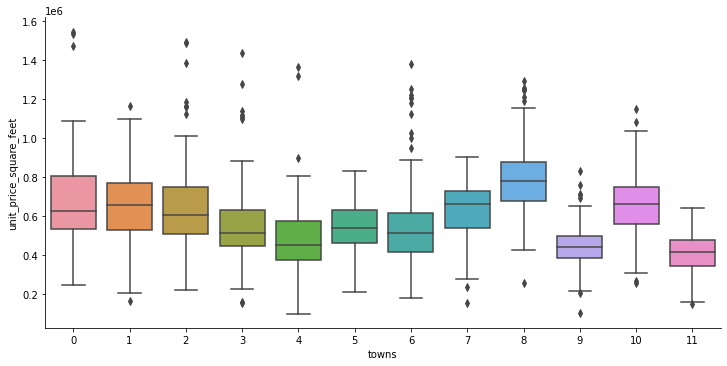

In [54]:
sns.catplot(x = 'towns', y = 'unit_price_square_feet', data = tpcopy, kind = 'box', aspect = 2)